<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/Avocado_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [0]:
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

url = 'drive/My Drive/datasets/avocado.csv'
avocado = pd.read_csv(url)

In [0]:
avocado = avocado.drop(['Unnamed: 0'],axis =1 )
names = ['date','avprice','totalvol','small','large','xlarge',
         'totalbags','smallbags','largebags','xlargebags','type','year','region']
avocado = avocado.rename(columns=dict(zip(avocado.columns,names)))

In [36]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        18249 non-null  object 
 1   avprice     18249 non-null  float64
 2   totalvol    18249 non-null  float64
 3   small       18249 non-null  float64
 4   large       18249 non-null  float64
 5   xlarge      18249 non-null  float64
 6   totalbags   18249 non-null  float64
 7   smallbags   18249 non-null  float64
 8   largebags   18249 non-null  float64
 9   xlargebags  18249 non-null  float64
 10  type        18249 non-null  object 
 11  year        18249 non-null  int64  
 12  region      18249 non-null  object 
 13  Year        18249 non-null  int64  
 14  Month       18249 non-null  int64  
 15  Day         18249 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 2.2+ MB


In [0]:
avocado['Year'],avocado['Month'],avocado['Day'] = avocado['date'].str.split('-').str

In [0]:
for i in ['Year','Month','Day']:
  avocado[i] = list(map(int,avocado[i]))

Text(0, 0.5, 'Regions')

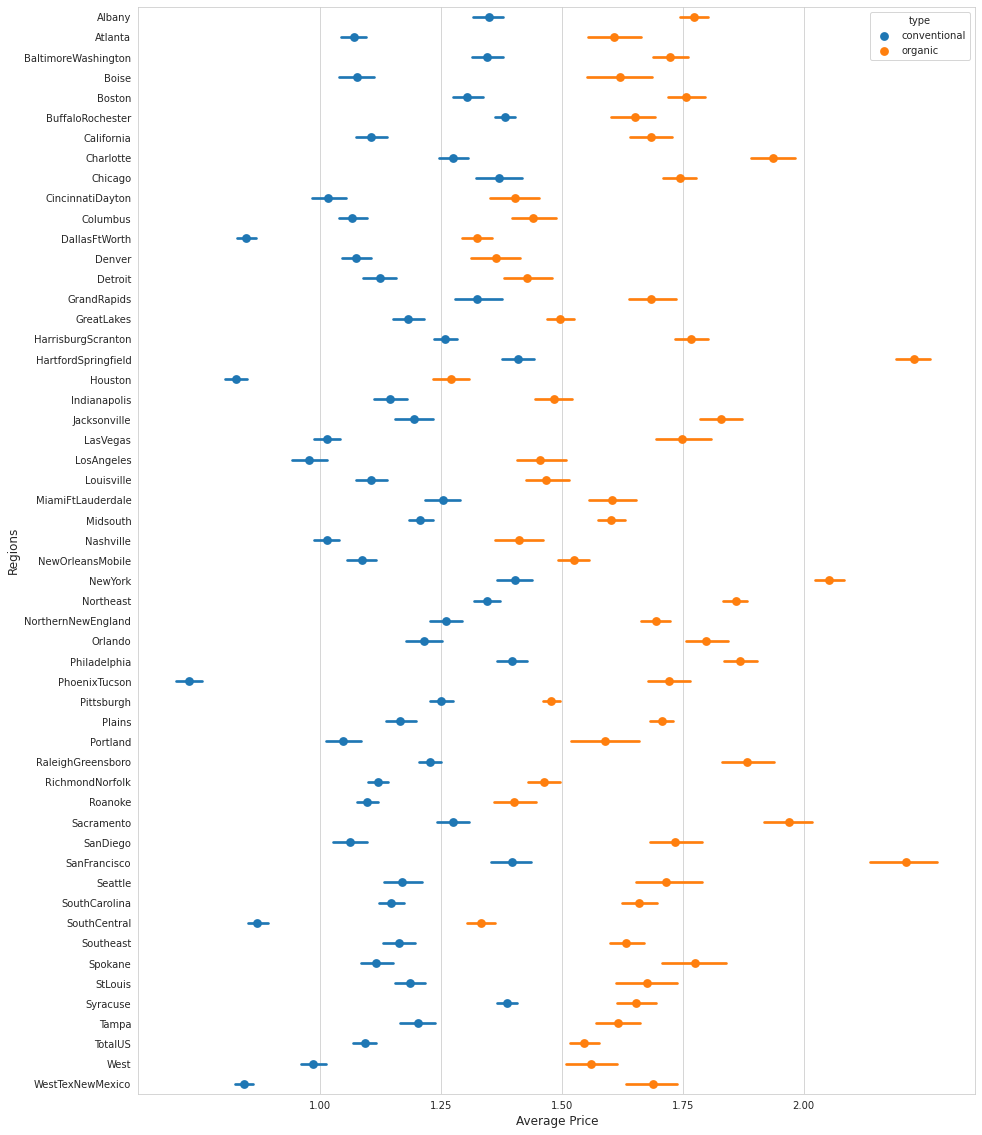

In [35]:
plt.figure(figsize=(15,20))
sb.pointplot(x='avprice',y='region',data=avocado,hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize':'large'})
plt.ylabel('Regions',{'fontsize':'large'})

In [66]:
#One hot encoding
ohe = pd.get_dummies(avocado[['region','type']])
ohe

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [0]:
y = np.array(avocado['avprice'])
data = np.array(avocado)
X = np.c_[data[:,2:10],data[:,13:16],np.array(ohe)]

In [0]:
transform = MinMaxScaler()
X = transform.fit_transform(X)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [0]:
network = models.Sequential()
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='rmsprop',
                loss='mean_squared_error',)               

network.fit(X_train,y_train,epochs=50,batch_size=128)

In [0]:
def compare_graph(network,X_test,y_test):
  y_pred = network.predict(X_test).flatten()
  real = []
  pred = []
  index = []
  for i in range(100):
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])
  plt.figure(figsize=(10,5))
  plt.plot(index,real,'b-',label='Real Price')
  plt.plot(index,pred,'r--',label='Pred price')
  plt.legend(loc='center left',fontsize=12)
  plt.show()

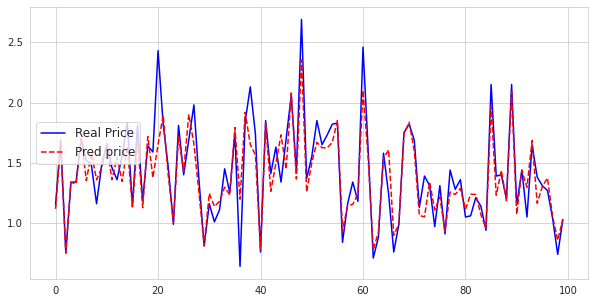

In [65]:
compare_graph(network,X_test,y_test)